In [1]:
from matplotlib import dates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
raw

def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] # using a list comprehension to extract the first entry for each tuple in 
                                        # the multi-index from .columns ^above^
    df.columns = outer
    return df

(raw
 .iloc[:, ::2]
 .pipe(fix_cols)
)

import yfinance as yf
def fix_cols(df):
    columns = df.columns
    outer = [col[0] for col in columns] 
    df.columns = outer
    return df

def tweak_data():
    raw = yf.download('SPY AAPL', start = '2010-01-01', end = '2019-12-31')
                    
    return(raw
     .iloc[:, :-2:2] # :-2:2 takes out volume, ::2 leaves volume in
     .pipe(fix_cols)
)
                      
tweak_data()


# TO define apple data
aapl = (raw
        .iloc[:,::2]
        .pipe(fix_cols))

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


## Challenge 3

## Create a plot with 3 lines:

## -AAPL close price in 2015
## -Exponential moving average with alpha = .0392
## -Exponential moving average with alpha = .00995

## Hint: use the .ewm method to create a rolling aggregator

<AxesSubplot:xlabel='Date'>

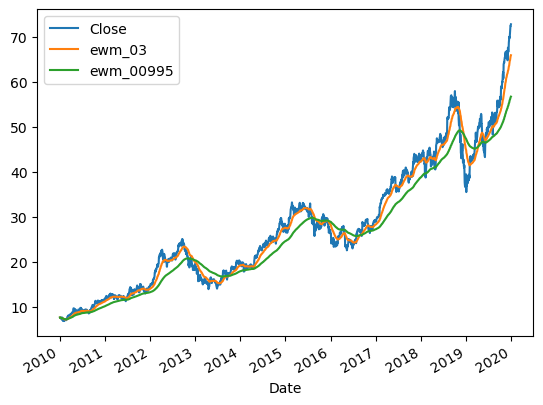

In [3]:
(aapl
 .assign(ewm_03 = aapl.Close.ewm(alpha=.0392).mean(),
         ewm_00995 = aapl.Close.ewm(alpha=.00995).mean())
 .loc['2010':'2019' , ['Close', 'ewm_03', 'ewm_00995']]
 .plot()
)